# Check for stationarity

A stationary time series has a constant mean, variance, and covariance over time, and this is an important assumption for many time series analysis techniques. To check for stationarity in a time series, we can perform a statistical test called the Augmented Dickey-Fuller (ADF) test.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the random seed for reproducibility
#np.random.seed(123)

# create an array of random prices for 365 days
prices = np.random.normal(100, 10, size=365)

# create a date range for the 365 days
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# create a Pandas DataFrame with the prices and dates
df = pd.DataFrame({'date': dates, 'close': prices})

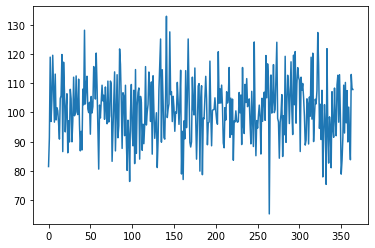

In [7]:
plt.plot(df.close)

In [8]:
from statsmodels.tsa.stattools import adfuller

# perform the ADF test on the time series
result = adfuller(df['close'])

# extract the p-value from the test result
p_value = result[1]

# print the test result and p-value
print('ADF Statistic:', result[0])
print('p-value:', p_value)
print('Critical Values:', result[4])



ADF Statistic: -19.382215452995506
p-value: 0.0
Critical Values: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


The adfuller function returns a tuple containing several test statistics, including the ADF statistic, and the p-value for the test. The p-value is what we are interested in to determine if the time series is stationary or not.

If the p-value is less than a chosen significance level (typically 0.05), we can reject the null hypothesis that the time series is non-stationary. In this example, the p-value is greater than 0.05, indicating that we cannot reject the null hypothesis that the time series is non-stationary.

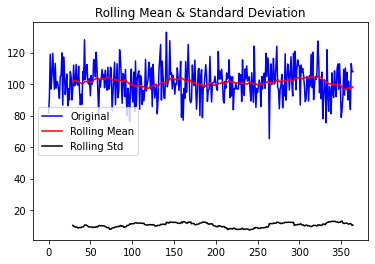

In [4]:
def check_stationarity(data):
    # Plot the rolling mean and standard deviation
    rolling_mean = data.rolling(window=30).mean()
    rolling_std = data.rolling(window=30).std()
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
check_stationarity(df['close'])    

# Partial Autocorrelation Function (PACF)

Text(0, 0.5, 'PACF')

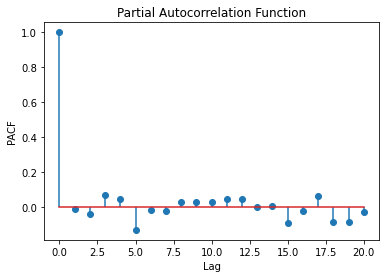

In [9]:
from statsmodels.tsa.stattools import pacf

# compute the PACF of the time series data
pacf_vals = pacf(df['close'], nlags=20)

# create a plot of the PACF values
plt.stem(pacf_vals)

# set the plot title and axis labels
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')

When you run this code, you should see a plot of the PACF values for the daily stock prices time series data. The plot should show the PACF values for lags 0 to 20, with a marker at each lag indicating the strength of the correlation between the time series and its lagged values at that lag. The PACF plot can be used to identify the order of the autoregressive (AR) component of an ARIMA model for the time series data.

# Another Example

In this example, we generate a random time series of 1000 data points using NumPy's random.normal function. Then, we add some non-zero lags by setting some values of the time series to be a linear combination of previous values with weights of 0.5. Specifically, we set the values of the time series from index 3 to 9 to be a linear combination of previous values with weights of 0.5. This creates a lag effect that the PACF should be able to detect.

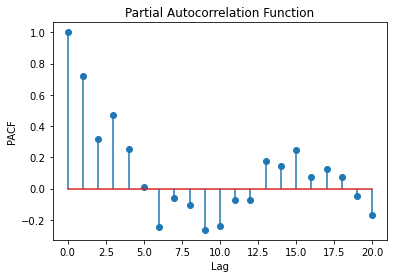

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# Generate a random time series
#np.random.seed(42)
ts_data = np.random.normal(size=1000)

# Set some specific lag to be non-zero
for i in range(3, 9):
    ts_data[i:] += 0.5 * ts_data[:-i]

# Compute the PACF of the time series data
pacf_vals = pacf(ts_data, nlags=20)

# Create a plot of the PACF values
plt.stem(pacf_vals)

# Set the plot title and axis labels
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')

# Display the plot
plt.show()

In the context of the line of code ts_data[i:] += 0.5 * ts_data[:-i], ts_data[i:] refers to a slice of the ts_data array starting from the ith index and continuing until the end of the array. The += operator is used to add a new value to each element of this slice, which in this case is the result of multiplying each element of ts_data[:-i] (a slice containing all elements of ts_data up to the ith index) by a factor of 0.5. This operation adds a non-zero lag effect to the time series by creating a linear combination of previous values of the time series with specific weights.

In [12]:
example = np.array([1,4,5,0,7,9])
example

array([1, 4, 5, 0, 7, 9])

In [15]:
0.5*example[:-3]+example[3:]

array([ 0.5,  9. , 11.5])

# Cross-correlation function (CCF) 

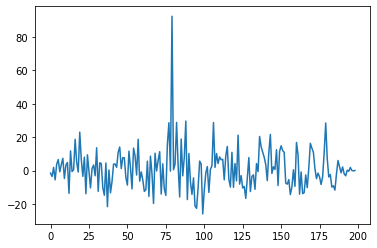

In [25]:
import numpy as np

# Generate two example time series
x = np.random.randn(100)

# Roll array elements along a given axis
y = np.roll(x, 20) + np.random.randn(100)

# Calculate the cross-correlation function
#The mode='full' argument specifies that we want to compute the cross-correlation over all possible lags.

ccf = np.correlate(x,y, mode='full')

# Plot the cross-correlation function
import matplotlib.pyplot as plt
plt.plot(ccf)
plt.show()


# Correlation between two Gaussian sin wave at frequency 20Hz

Text(0.5, 1.0, 'correlation')

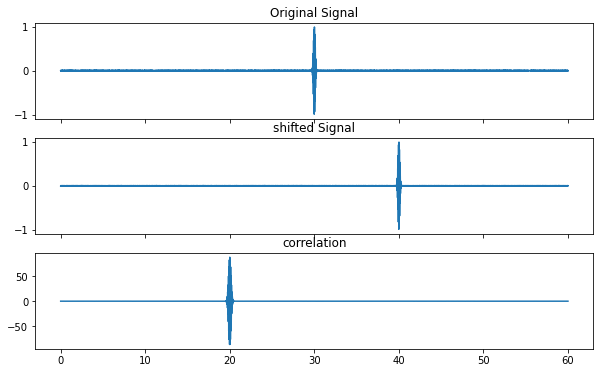

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set the sampling frequency and time duration
fs = 1000  # Hz
duration = 60  # seconds

# Generate the time vector
t = np.arange(0, duration, 1/fs)

f = 20 #Hz
sigma = 0.1  # seconds (width of the Gaussian envelope)
# Generate the sin wave and Gaussian envelope
sin_wave = np.sin(2*np.pi*f*t)
gaussian_envelope = np.exp(-(t-duration/2)**2/(2*(sigma**2)))

# Generate the Gaussian sin wave (by multiplying the sin wave and Gaussian envelope)
gaussian_sin_wave = sin_wave * gaussian_envelope

# Add white noise to the signal
signal = gaussian_sin_wave + 0.001*np.random.randn(len(t))

# Create a time-shifted version of the signal
shifted_signal = np.roll(signal, int(fs*10))

# Calculate the cross-correlation between the signal and shifted_signal
corr = np.correlate(signal, shifted_signal, mode='same')

# Plot the original signal, the shifted signal, and the cross-correlation
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
axs[0].plot(t, signal)
axs[0].set_title('Original Signal')

axs[1].plot(t, shifted_signal)
axs[1].set_title('shifted Signal')

axs[2].plot(t, corr)
axs[2].set_title('correlation')


In [28]:

# get the index of the maximum correlation value
max_corr_index = np.argmax(corr)

# compute the lag at which the maximum correlation occurs
lag = (max_corr_index - (len(signal) - 1))

# print the maximum correlation and the lag
print(f"The maximum correlation between 'Confirmed' and 'Deaths' is {corr[max_corr_index]:.2f} with a lag of {lag/fs} seconds.")

The maximum correlation between 'Confirmed' and 'Deaths' is 586.03 with a lag of -39.999 seconds.


# Normalized cross-correlation

note that cross-correlation measures the similarity between two time series as a function of the time lag between them. Therefore, it's important to visually inspect the time series and the cross-correlation plot to ensure that the correlations are meaningful and not simply the result of noise or other artifacts in the data.

In [20]:
np.std(shifted_signal)

0.10697319401419254

In [31]:
# compute the normalized cross-correlation
corr_n = np.correlate(signal, shifted_signal, mode='same') / np.sqrt(np.sum(signal**2)*np.sum(shifted_signal**2))
print(f"The maximum normalized cross-correlation is {np.max(corr_n):.2f}.")

The maximum normalized cross-correlation is 1.00.


# Pearson correlation coefficient

This measures the linear correlation between two time series. It ranges between -1 and 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

In [33]:
from scipy.stats import pearsonr

In [34]:
# compute the Pearson correlation coefficient between the 'Confirmed' and 'Deaths' columns
corr, p_value = pearsonr(signal, shifted_signal)
print(f"The Pearson correlation coefficient between 'signal' and 'shifted signal' is {corr:.2f} with a p-value of {p_value:.2f}.")

The Pearson correlation coefficient between 'signal' and 'shifted signal' is -0.00 with a p-value of 0.98.


In the context of correlation analysis, the p-value is used to test the null hypothesis that there is no correlation between the two variables being studied. A small p-value indicates strong evidence against the null hypothesis, and therefore suggests that there is a significant correlation between the two variables. Conversely, a large p-value suggests that there is not enough evidence to reject the null hypothesis, and therefore there is not enough evidence to suggest that there is a significant correlation between the two variables.

# Granger causality

Granger causality is a statistical concept that tests whether one time series can be used to predict another time series. The idea is that if a time series X can be used to predict another time series Y, then X is said to "Granger-cause" Y. The term "Granger causality" was introduced by Clive Granger, who received the Nobel Memorial Prize in Economic Sciences in 2003 for his contributions to time series analysis.

The Granger causality test is commonly used in time series analysis to identify the causal relationships between different variables. It is particularly useful when dealing with economic or financial data, where it is often important to understand how different factors affect each other.

The Granger causality test is based on the idea that if X Granger-causes Y, then the past values of X should contain information that helps predict Y. The test involves running a regression analysis on the time series data and comparing the results of two models: one that includes the past values of both X and Y as predictors, and another that includes only the past values of Y as predictors. The test then compares the goodness-of-fit of the two models to determine if X is a significant predictor of Y.

There are a few things to keep in mind when using the Granger causality test:

The test only detects linear causal relationships. Nonlinear relationships may not be detected by the test.
The test assumes that the time series data is stationary. If the data is non-stationary, it may need to be preprocessed before running the test.
The test results should be interpreted with caution. A significant result may indicate a causal relationship, but it does not necessarily prove causality.
In summary, the Granger causality test is a useful tool for identifying causal relationships between time series data. It is commonly used in economics, finance, and other fields where understanding the relationships between different variables is important.

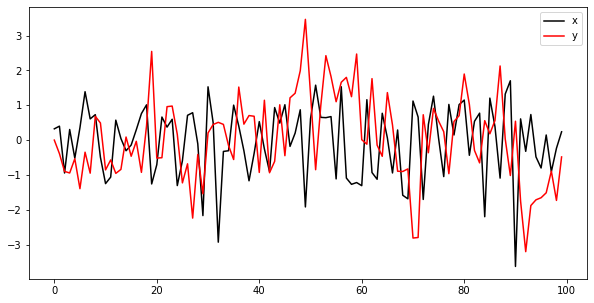

In [35]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# generate some sample data
nobs = 100
x = np.random.randn(nobs)
y = np.zeros(nobs)
for i in range(1, nobs):
    y[i] = 0.5*y[i-1] + 0.3*x[i-1] + np.random.randn()

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x,'k', label='x')
plt.plot(y,'r', label='y')
plt.legend()

<StemContainer object of 3 artists>

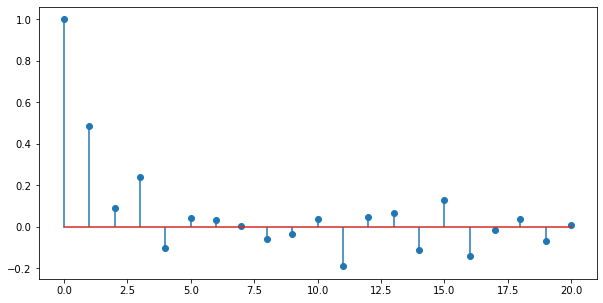

In [38]:
# Compute the PACF of the time series data
pacf_vals = pacf(y, nlags=20)

# Create a plot of the PACF values
fig, ax = plt.subplots(figsize=(10,5))
plt.stem(pacf_vals)

<StemContainer object of 3 artists>

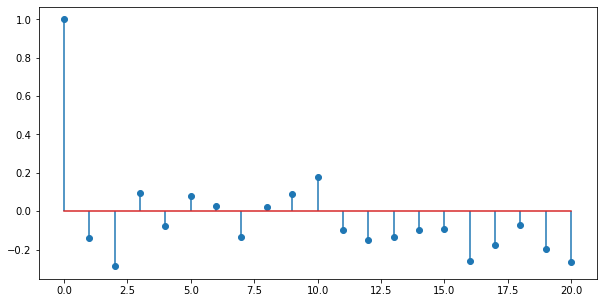

In [39]:
# Compute the PACF of the time series data
pacf_vals = pacf(x, nlags=20)

# Create a plot of the PACF values
fig, ax = plt.subplots(figsize=(10,5))
plt.stem(pacf_vals)

In [40]:
# choose maxlag based on PACF plot
maxlag_y = 5

# run the Granger causality test
maxlag = max(maxlag_y, 1) # at least 1
test_results = grangercausalitytests(np.column_stack((y, x)), maxlag,verbose=False)

# print the test results
for lag in range(1, maxlag+1):
    print(f'Lag {lag}:')
    if test_results[lag][0] is not None:
        print(f'F-Statistic: {test_results[lag][0]["params_ftest"][0]:.4f}, p-value: {test_results[lag][0]["params_ftest"][1]:.4f}')
    else:
        print("No significant Granger causality.")


Lag 1:
F-Statistic: 18.9164, p-value: 0.0000
Lag 2:
F-Statistic: 13.5090, p-value: 0.0000
Lag 3:
F-Statistic: 8.6001, p-value: 0.0000
Lag 4:
F-Statistic: 6.8368, p-value: 0.0001
Lag 5:
F-Statistic: 5.5325, p-value: 0.0002


# how to interpret the output of grangercausalitytests?

The grangercausalitytests function from the statsmodels.tsa.stattools module returns a dictionary of test results for each lag value specified in the test. Each test result contains several statistical measures that can be used to interpret the results of the Granger causality test. Here is a brief explanation of some of the key statistical measures in the output:

F-statistic: The F-statistic measures the degree of Granger causality between the two time series being tested. A higher F-statistic value indicates a stronger causal relationship between the time series.
p-value: The p-value indicates the statistical significance of the Granger causality test. A low p-value (typically less than 0.05) indicates that the causal relationship between the time series is statistically significant, while a high p-value indicates that the relationship is not statistically significant.
Residuals: The residuals are the differences between the actual values of the dependent variable and the predicted values from the model. In the case of the Granger causality test, the residuals represent the part of the dependent variable that cannot be explained by the independent variable.
Degrees of freedom: The degrees of freedom represent the number of observations in the sample minus the number of parameters estimated in the model. The degrees of freedom are used to calculate the p-value of the test.

To interpret the output of the grangercausalitytests function, you should look at the F-statistic and p-value for each lag value tested. If the p-value is below a certain significance level (such as 0.05), then you can conclude that there is a significant causal relationship between the two time series being tested. You should also look at the residuals to see how well the model fits the data. If the residuals are large or exhibit a pattern, then it may indicate that the model is not a good fit for the data.

# how to choose the maxlag?

Choosing the maximum lag value (maxlag) in the Granger causality test is an important decision, as it can affect the accuracy and reliability of the test results. Here are some guidelines on how to choose an appropriate maxlag value:

Use prior knowledge: If you have prior knowledge about the time series being tested, such as the frequency of seasonal patterns, you can use that information to estimate an appropriate maxlag value.
Use information criteria: Information criteria, such as the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), can be used to compare the goodness of fit of different models. You can try different maxlag values and choose the one that minimizes the AIC or BIC value.
Use rule of thumb: A common rule of thumb is to choose a maxlag value based on the length of the time series being tested. For example, if the time series has 100 observations, you might choose a maxlag value of 10 or 12.
Use diagnostic plots: You can also use diagnostic plots, such as the ACF and PACF plots, to identify any significant autocorrelation patterns in the residuals. This can help you choose an appropriate maxlag value to capture any significant autocorrelation patterns.

It's important to note that there is no one-size-fits-all answer to choosing the maxlag value in the Granger causality test. You should use a combination of the above methods and consider the specific characteristics of your data to make an informed decision. Additionally, it's a good practice to test different maxlag values and compare the results to ensure the stability of the causal relationship over different lag lengths.